In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [ ]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.680000,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,129.258606,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.907555,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.169800,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,130.284698,105158200


In [ ]:
df_AAPL = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)

In [ ]:
df_AAPL.dtypes

Date       object
Close     float64
Volume      int64
dtype: object

In [ ]:
df_AAPL.rename(columns = {'Close': 'Close_AAPL', 'Volume': 'Volume_AAPL'})

,Date,Close_AAPL,Volume_AAPL
0,2021-01-04,129.410004,143301900
1,2021-01-05,131.009995,97664900
2,2021-01-06,126.599998,155088000
3,2021-01-07,130.919998,109578200
4,2021-01-08,132.050003,105158200
...,...,...,...
498,2022-12-23,131.860001,63814900
499,2022-12-27,130.029999,69007800
500,2022-12-28,126.040001,85438400
501,2022-12-29,129.610001,75703700


<Axes: xlabel='Date', ylabel='Close'>

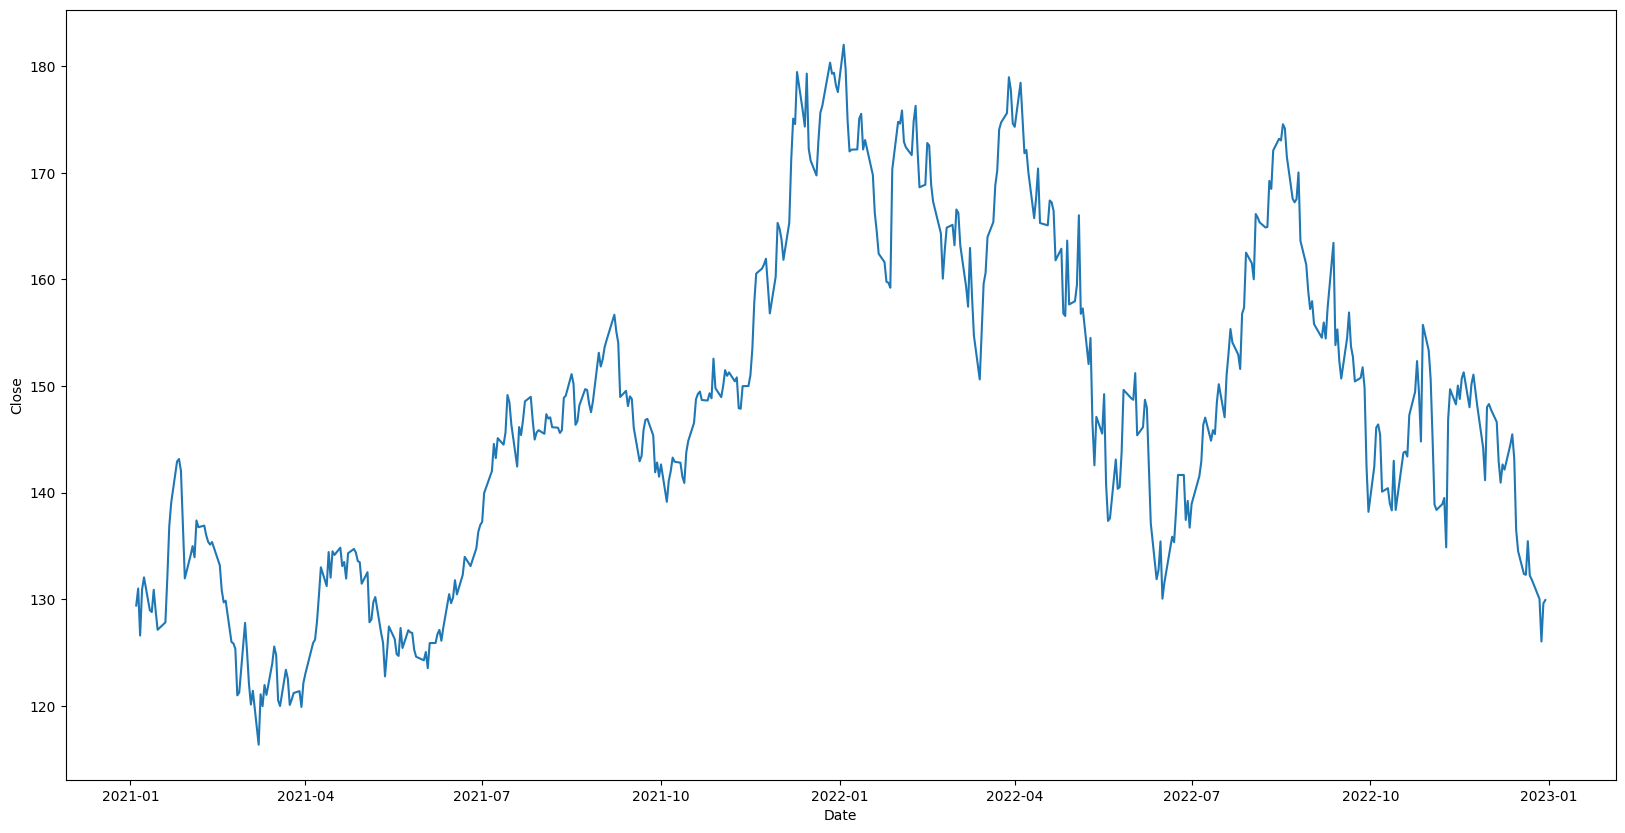

In [ ]:
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Close", data = df_AAPL)

<Axes: xlabel='Close', ylabel='Count'>

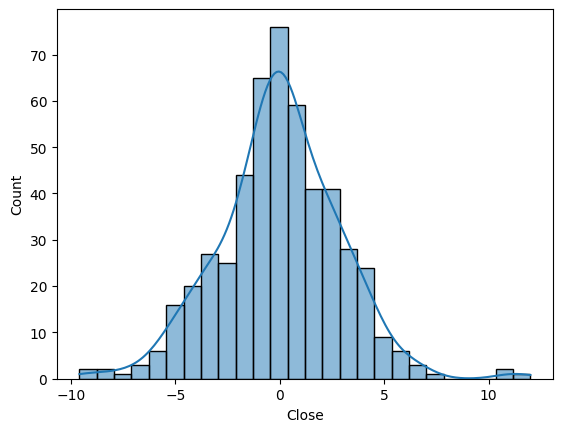

In [ ]:
onedaydiff = df_AAPL.Close.diff()
sns.histplot(onedaydiff, kde = True) # normal returns

<Axes: xlabel='Date', ylabel='Returns'>

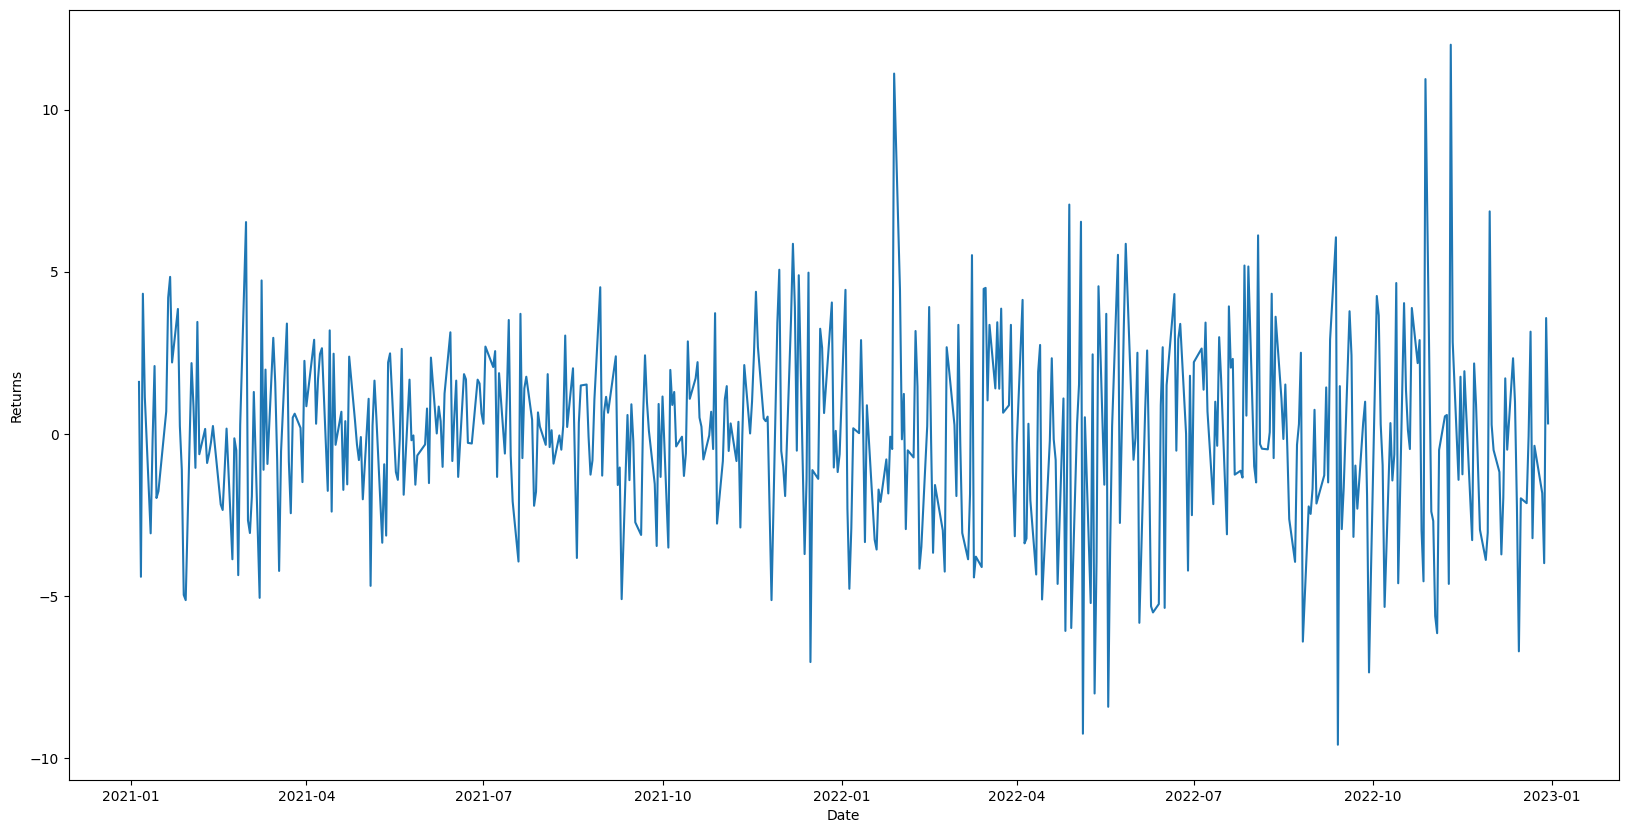

In [ ]:
df_AAPL['Returns'] = onedaydiff

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Returns", data = df_AAPL)

<Axes: xlabel='Volume', ylabel='Count'>

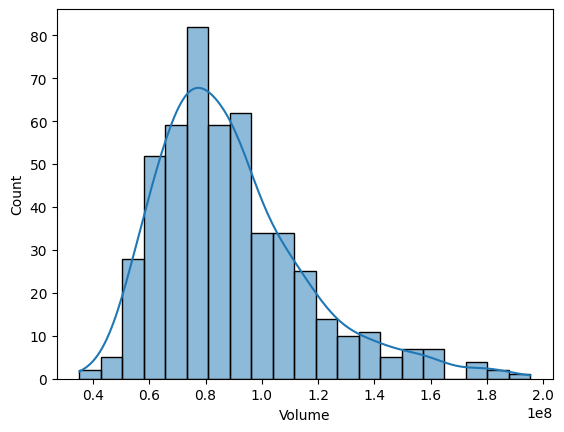

In [ ]:
sns.histplot(df_AAPL.Volume, kde = True) # log normal distribution

In [ ]:
df = pd.read_csv("MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,222.529999,223.000000,214.809998,217.690002,213.341995,37130100
1,2021-01-05,217.259995,218.520004,215.699997,217.899994,213.547821,23823000
2,2021-01-06,212.169998,216.490005,211.940002,212.250000,208.010666,35930700
3,2021-01-07,214.039993,219.339996,213.710007,218.289993,213.930008,27694500
4,2021-01-08,218.679993,220.580002,217.029999,219.619995,215.233444,22956200


In [ ]:
df_MSFT = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)
df_MSFT.rename(columns = {'Close': 'Close_MSFT', 'Volume': 'Volume_MSFT'})

,Date,Close_MSFT,Volume_MSFT
0,2021-01-04,217.690002,37130100
1,2021-01-05,217.899994,23823000
2,2021-01-06,212.250000,35930700
3,2021-01-07,218.289993,27694500
4,2021-01-08,219.619995,22956200
...,...,...,...
498,2022-12-23,238.729996,21207000
499,2022-12-27,236.960007,16688600
500,2022-12-28,234.529999,17457100
501,2022-12-29,241.009995,19770700


<Axes: xlabel='Date', ylabel='Close'>

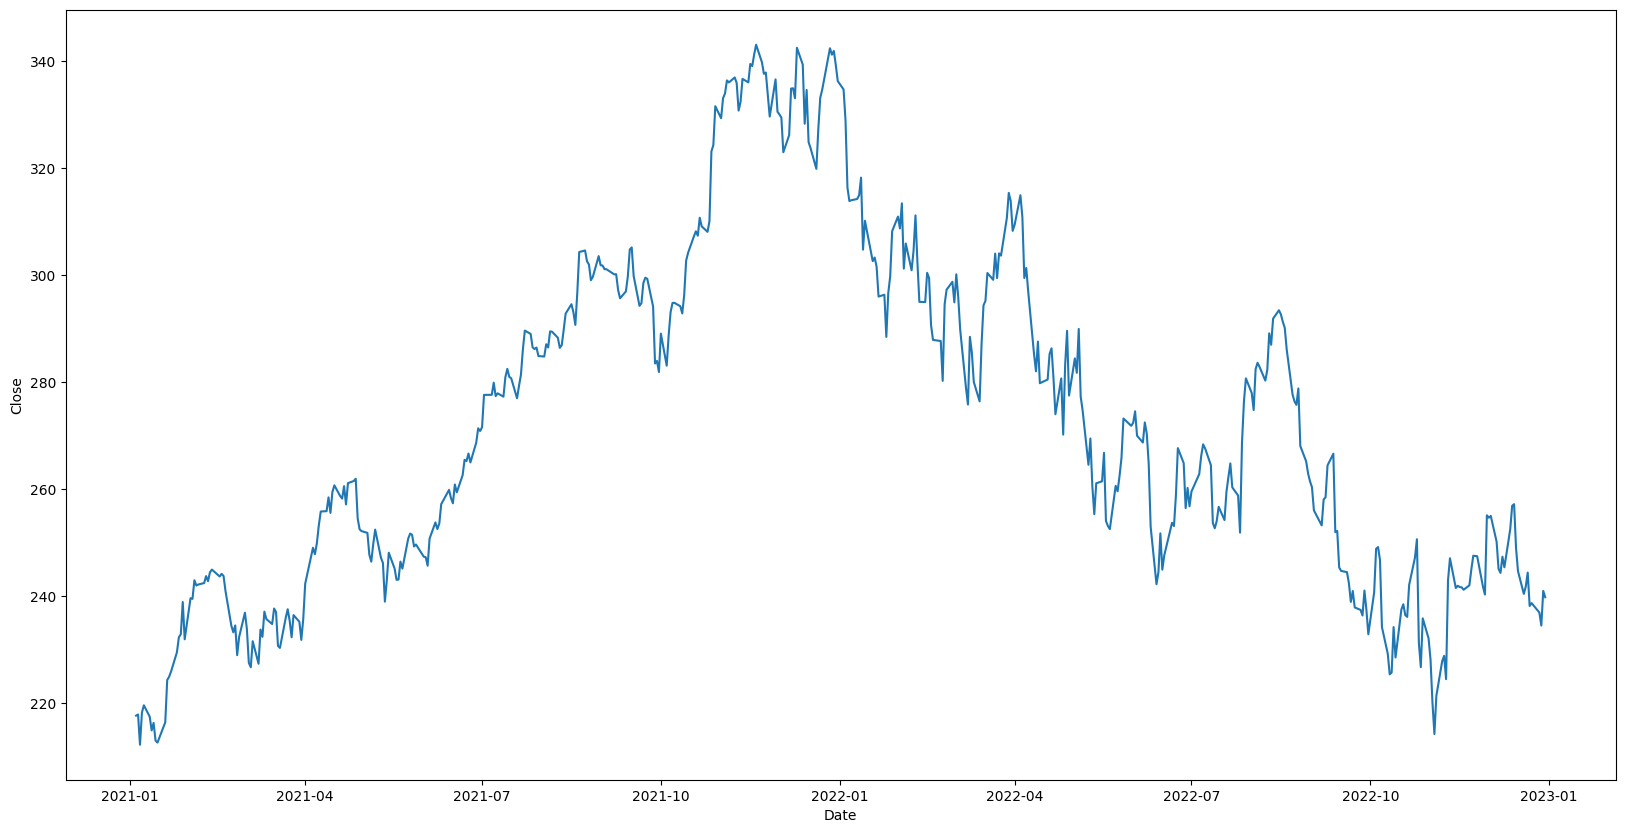

In [ ]:
df_MSFT['Date'] = pd.to_datetime(df_MSFT['Date'])

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Close", data = df_MSFT)

<Axes: xlabel='Close', ylabel='Count'>

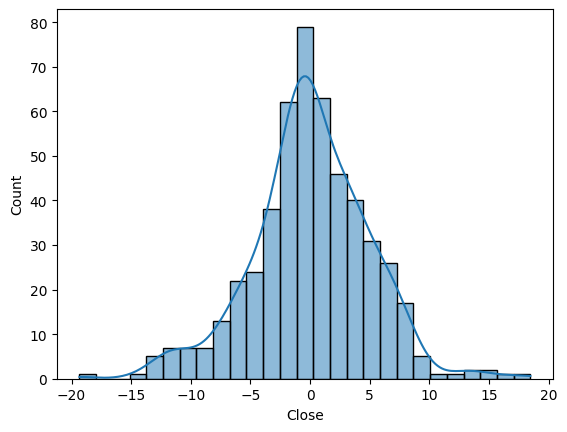

In [ ]:
onedaydiff = df_MSFT.Close.diff()
sns.histplot(onedaydiff, kde = True) # normal returns

<Axes: xlabel='Date', ylabel='Returns'>

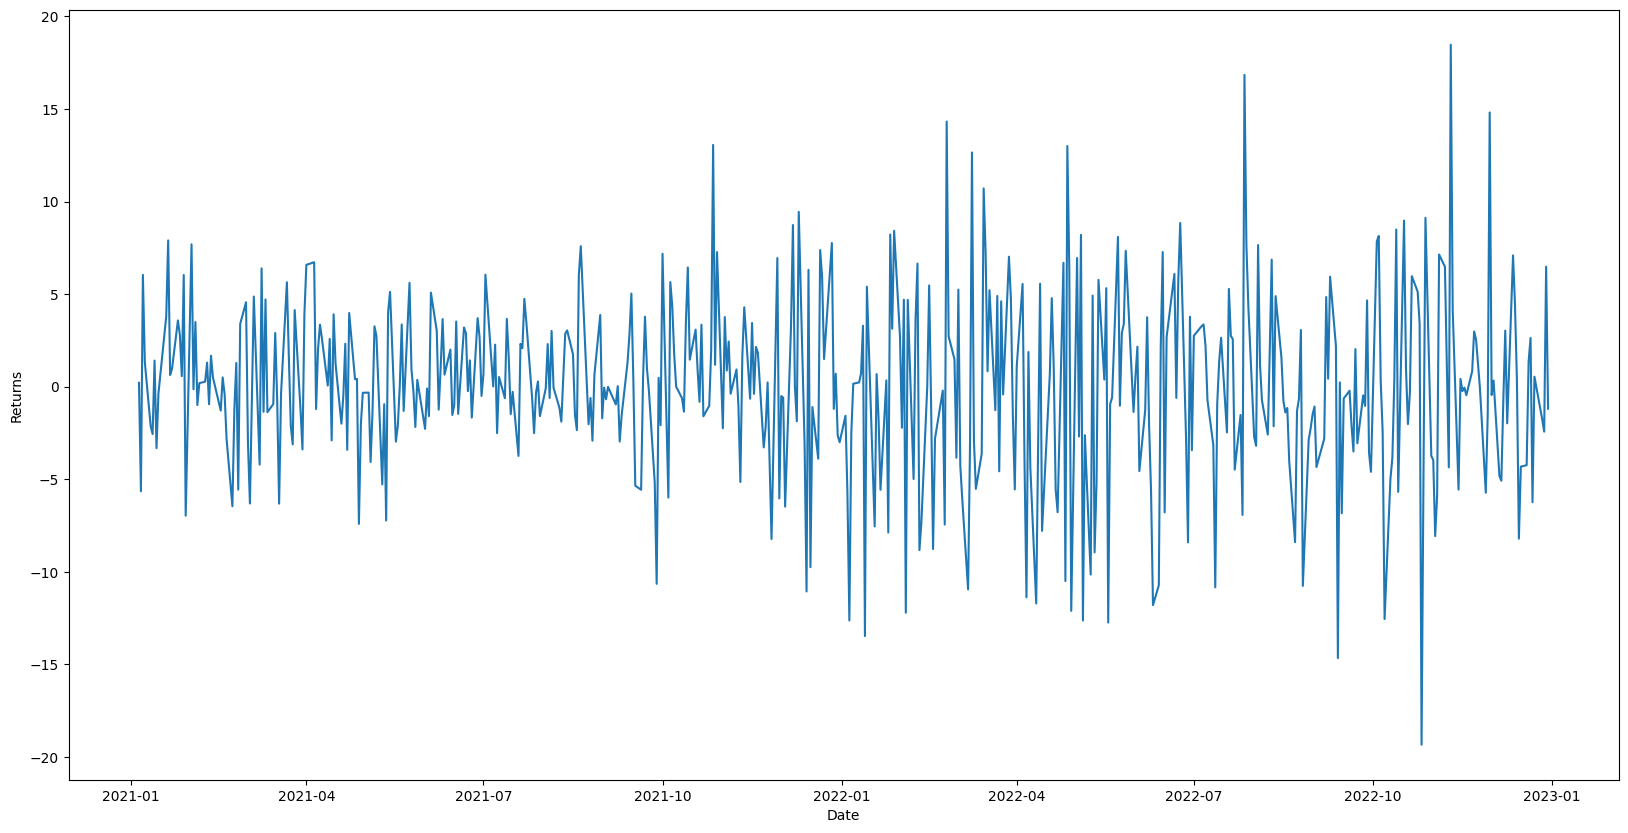

In [ ]:
df_MSFT['Returns'] = onedaydiff

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Returns", data = df_MSFT)

<Axes: xlabel='Volume', ylabel='Count'>

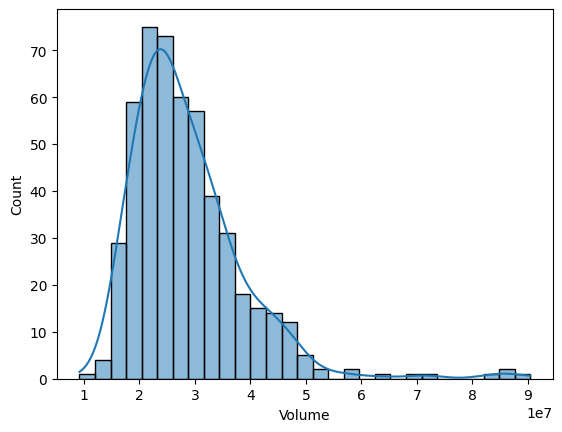

In [ ]:
sns.histplot(df_MSFT.Volume, kde = True) # log normal distribution

In [ ]:
df = pd.read_csv("005930.KS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,81000.0,84400.0,80200.0,83000.0,79551.828125,38655276
1,2021-01-05,81600.0,83900.0,81600.0,83900.0,80414.453125,35335669
2,2021-01-06,83300.0,84500.0,82100.0,82200.0,78785.078125,42089013
3,2021-01-07,82800.0,84200.0,82700.0,82900.0,79455.992188,32644642
4,2021-01-08,83300.0,90000.0,83000.0,88800.0,85110.867188,59013307


In [ ]:
df_SMSNG = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)
df_SMSNG.rename(columns = {'Close': 'Close_SMSNG', 'Volume': 'Volume_SMSNG'})

,Date,Close_SMSNG,Volume_SMSNG
0,2021-01-04,83000.0,38655276
1,2021-01-05,83900.0,35335669
2,2021-01-06,82200.0,42089013
3,2021-01-07,82900.0,32644642
4,2021-01-08,88800.0,59013307
...,...,...,...
487,2022-12-23,58100.0,9829407
488,2022-12-26,57900.0,6756411
489,2022-12-27,58100.0,10667027
490,2022-12-28,56600.0,14665410


<Axes: xlabel='Date', ylabel='Close'>

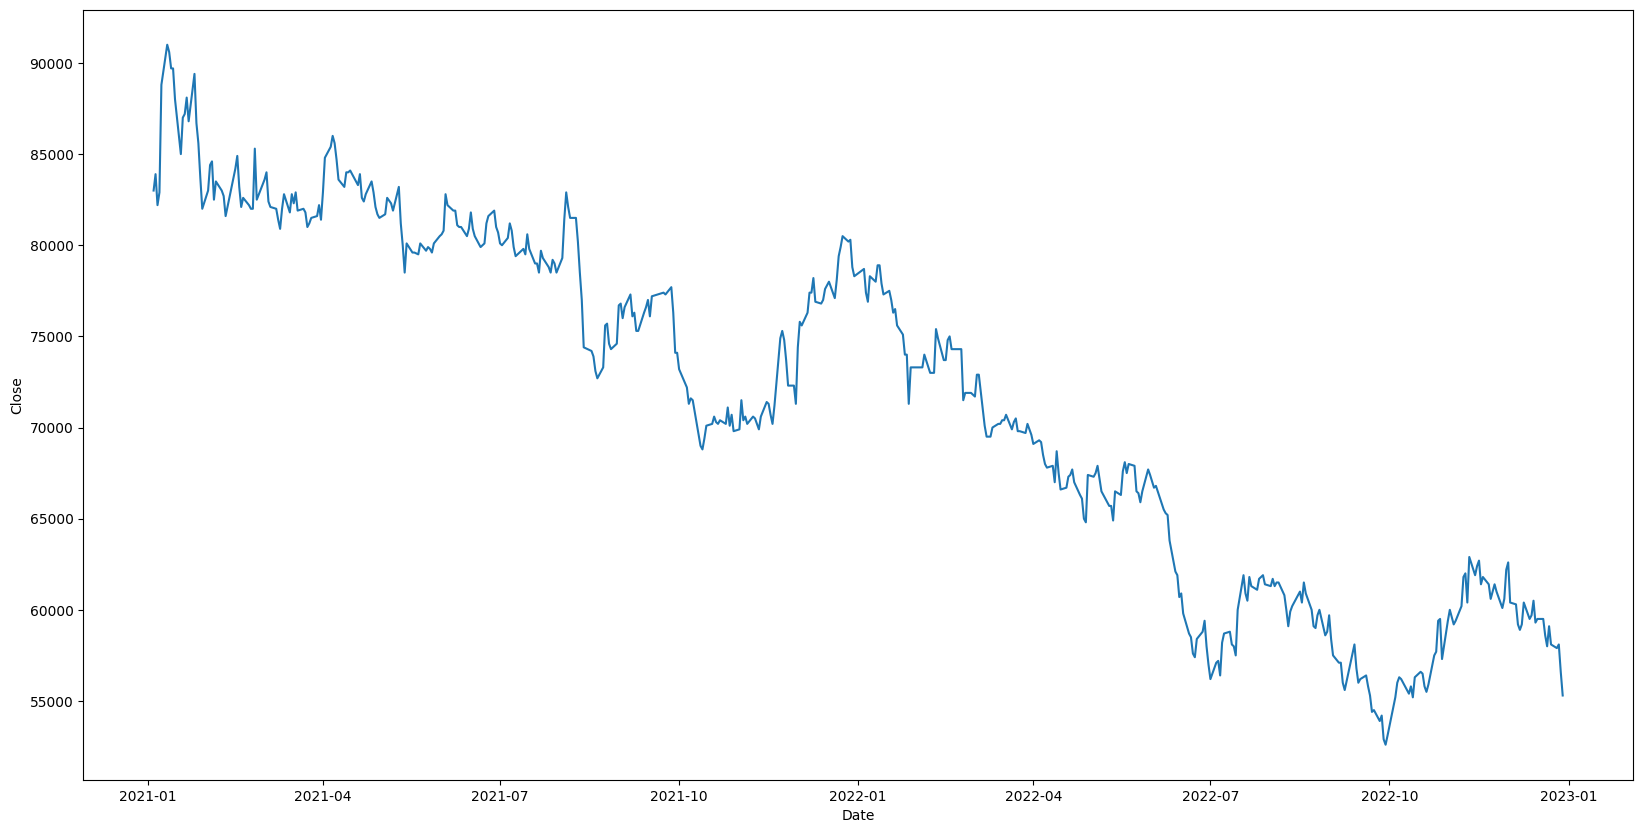

In [ ]:
df_SMSNG['Date'] = pd.to_datetime(df_SMSNG['Date'])

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Close", data = df_SMSNG)

<Axes: xlabel='Close', ylabel='Count'>

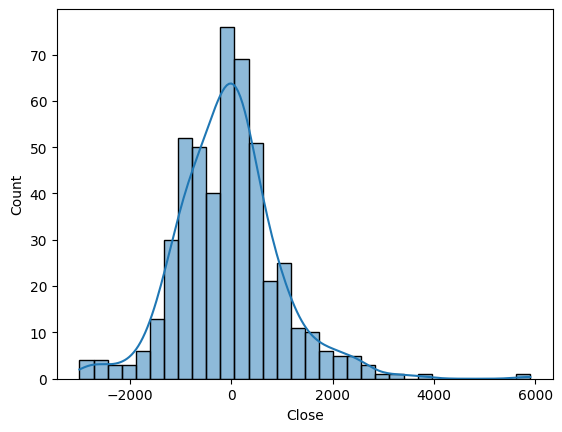

In [ ]:
onedaydiff = df_SMSNG.Close.diff()
sns.histplot(onedaydiff, kde = True) # normal returns

<Axes: xlabel='Date', ylabel='Returns'>

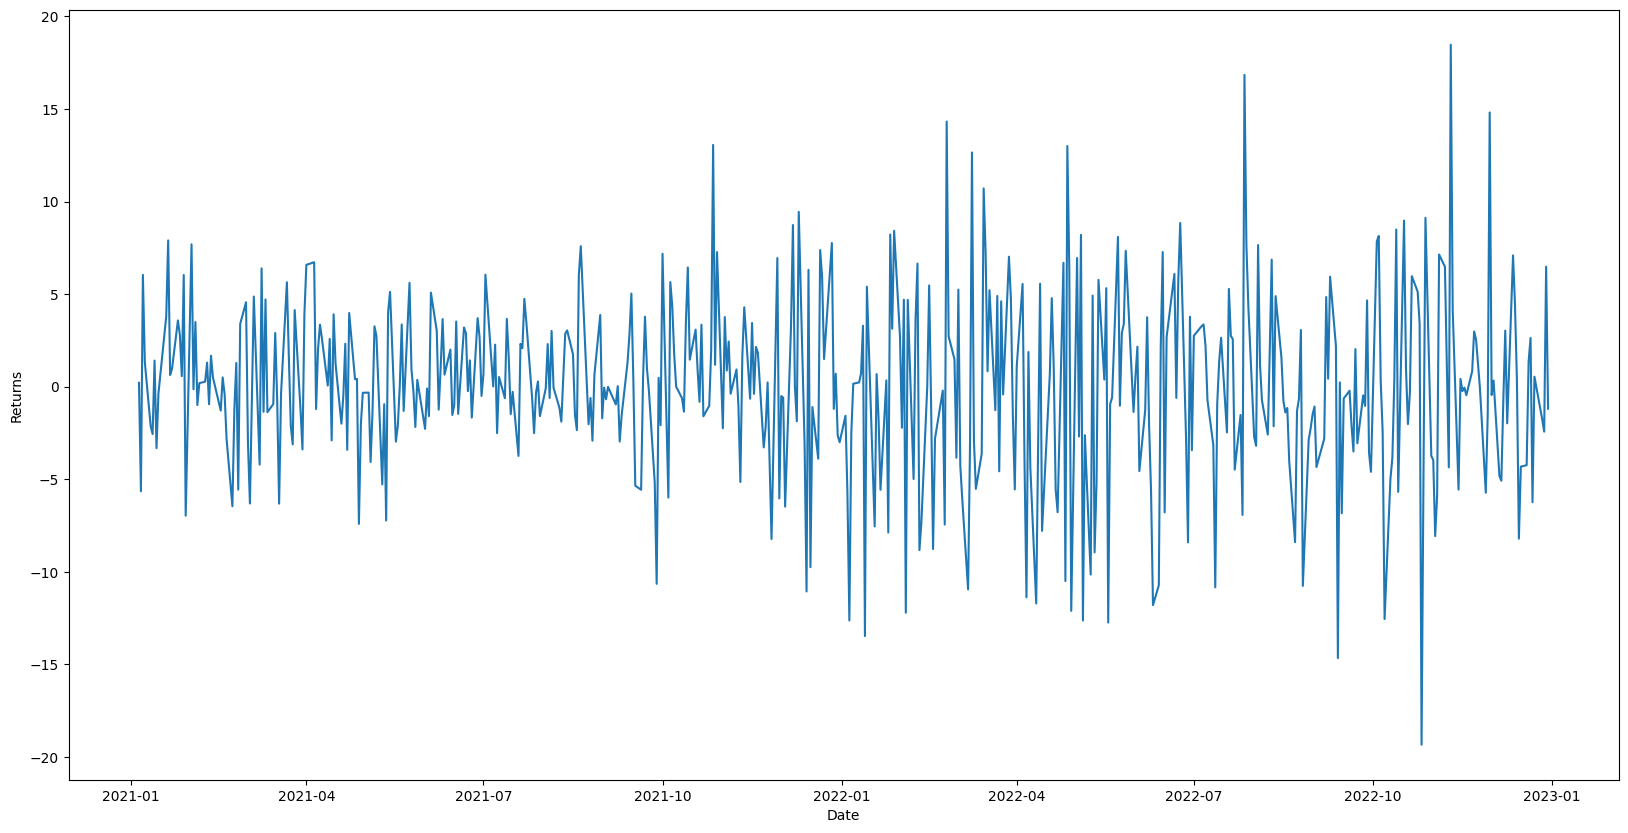

In [ ]:
df_SMSNG['Returns'] = onedaydiff

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Returns", data = df_MSFT)

<Axes: xlabel='Volume', ylabel='Count'>

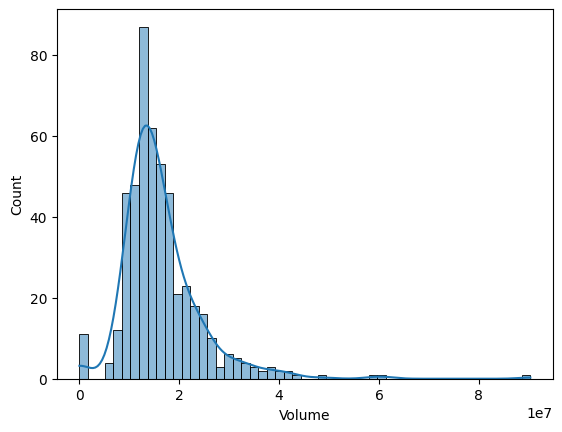

In [ ]:
sns.histplot(df_SMSNG.Volume, kde = True) # log normal distribution

In [ ]:
#df_AAPL is fine
df_MSFT2 = df_MSFT.drop(['Date'], axis = 1)
df_MSFT2.rename(columns = {'Close': 'Close_MSFT', 'Volume': 'Volume_MSFT'})


,Close_MSFT,Volume_MSFT,Returns
0,217.690002,37130100,NaN
1,217.899994,23823000,0.209992
2,212.250000,35930700,-5.649994
3,218.289993,27694500,6.039993
4,219.619995,22956200,1.330002
...,...,...,...
498,238.729996,21207000,0.539994
499,236.960007,16688600,-1.769989
500,234.529999,17457100,-2.430008
501,241.009995,19770700,6.479996


In [ ]:
df_mid = df_MSFT.merge(df_AAPL, how='left', on='Date')
df_all = df_SMSNG.merge(df_mid, how='left', on='Date')
df_Final = df_all.rename(columns = {'Close': 'Close_SMSNG', 'Volume': 'Volume_SMSNG', 'Returns': 'Returns_SMSNG', 'Close_x': 'Close_AAPL', 'Volume_x': 'Volume_AAPL', 'Returns_x': 'Returns_AAPL', 'Close_y': 'Close_MSFT', 'Volume_y': 'Volume_MSFT', 'Returns_y':'Returns_MSFT'})
df_Final.head()

df_Final.iloc[:, 4]

0      217.690002
1      217.899994
2      212.250000
3      218.289993
4      219.619995
          ...    
487    238.729996
488           NaN
489    236.960007
490    234.529999
491    241.009995
Name: Close_AAPL, Length: 492, dtype: float64

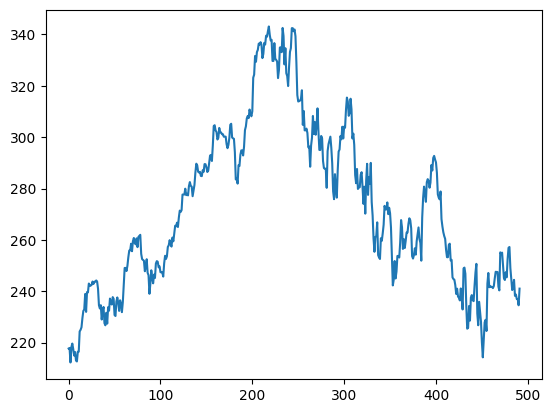

In [ ]:
df_All = df_Final.fillna(method = 'bfill')

plt.plot(df_All.iloc[:,4])

<ipython-input-25-37252fded8c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Final.corr())


<Axes: >

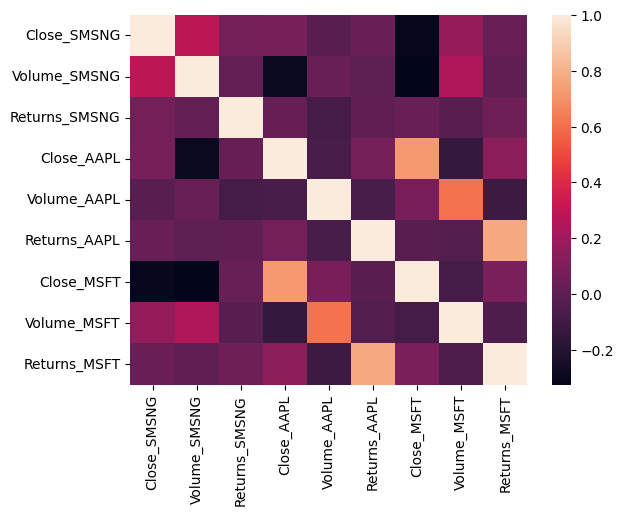

In [ ]:
sns.heatmap(df_Final.corr())

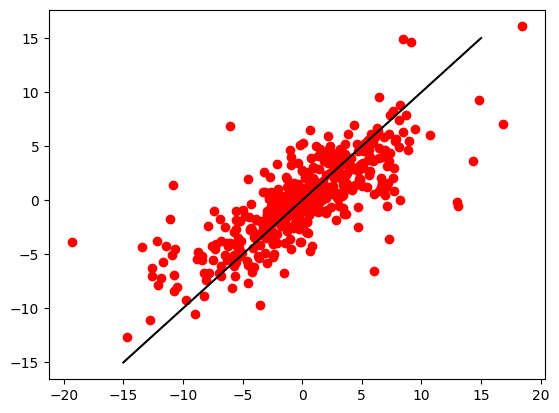

0.5958265600980545


In [ ]:
from sklearn.linear_model import LinearRegression as LR

y = np.array(df_All.Returns_AAPL).reshape(-1,1)
x = np.array(df_All.Returns_MSFT).reshape(-1,1)

model = LR().fit(x,y)
y_pred = model.predict(x)
plt.scatter(y, y_pred, color="red")
plt.plot([-15, 15], [-15, 15], color='black')
plt.show()
print(model.score(x,y))


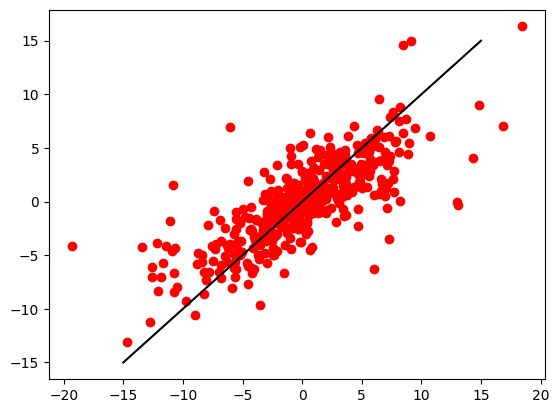

0.5968839819090754


In [ ]:

y = np.array(df_All.Returns_AAPL).reshape(-1,1)

x = np.hstack((np.array(df_All.Returns_MSFT).reshape(-1,1), np.array(df_All.Returns_SMSNG).reshape(-1,1), np.array(df_All.Volume_MSFT).reshape(-1,1), np.array(df_All.Volume_SMSNG).reshape(-1,1)))

model = LR().fit(x,y)
y_pred = model.predict(x)
plt.scatter(y, y_pred, color="red")
plt.plot([-15, 15], [-15, 15], color='black')
plt.show()
print(model.score(x, y))

In [ ]:
df_MSFT.head()

,Date,Close,Volume,Returns
0,2021-01-04,217.690002,37130100,NaN
1,2021-01-05,217.899994,23823000,0.209992
2,2021-01-06,212.250000,35930700,-5.649994
3,2021-01-07,218.289993,27694500,6.039993
4,2021-01-08,219.619995,22956200,1.330002


In [ ]:
df_MSFT2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    503 non-null    float64
 1   Volume   503 non-null    int64  
 2   Returns  502 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.9 KB


In [ ]:
df_MSFT2 = df_MSFT.replace(np.nan, 0)

datetimes = pd.to_datetime(df_MSFT2['Date'])

df_MSFT2['day'] = datetimes.dt.day
df_MSFT2['month'] = datetimes.dt.month
df_MSFT2['year'] = datetimes.dt.year


df_MSFT2.head()

,Date,Close,Volume,Returns,day,month,year
0,2021-01-04,217.690002,37130100,0.000000,4,1,2021
1,2021-01-05,217.899994,23823000,0.209992,5,1,2021
2,2021-01-06,212.250000,35930700,-5.649994,6,1,2021
3,2021-01-07,218.289993,27694500,6.039993,7,1,2021
4,2021-01-08,219.619995,22956200,1.330002,8,1,2021


In [ ]:
# Create a new dataframe with only the 'Close column 
data = df_MSFT2.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

478

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04157116],
       [0.04317587],
       [0.        ],
       [0.04615615],
       [0.0563197 ],
       [0.04004284],
       [0.02047985],
       [0.03125475],
       [0.00588418],
       [0.00305666],
       [0.03201897],
       [0.09238879],
       [0.09720314],
       [0.10469203],
       [0.13204953],
       [0.15344646],
       [0.1578022 ],
       [0.20388198],
       [0.15061905],
       [0.20938405],
       [0.20831421],
       [0.23498398],
       [0.2274186 ],
       [0.22887055],
       [0.23093386],
       [0.24086816],
       [0.23360852],
       [0.24637023],
       [0.25019111],
       [0.24033319],
       [0.24415406],
       [0.24102091],
       [0.21947122],
       [0.17010544],
       [0.16062973],
       [0.17041117],
       [0.12792302],
       [0.15382857],
       [0.18867496],
       [0.16521471],
       [0.11699526],
       [0.11065259],
       [0.14786801],
       [0.11569617],
       [0.16452699],
       [0.15413419],
       [0.19012691],
       [0.179

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.04157116, 0.04317587, 0.        , 0.04615615, 0.0563197 ,
       0.04004284, 0.02047985, 0.03125475, 0.00588418, 0.00305666,
       0.03201897, 0.09238879, 0.09720314, 0.10469203, 0.13204953,
       0.15344646, 0.1578022 , 0.20388198, 0.15061905, 0.20938405,
       0.20831421, 0.23498398, 0.2274186 , 0.22887055, 0.23093386,
       0.24086816, 0.23360852, 0.24637023, 0.25019111, 0.24033319,
       0.24415406, 0.24102091, 0.21947122, 0.17010544, 0.16062973,
       0.17041117, 0.12792302, 0.15382857, 0.18867496, 0.16521471,
       0.11699526, 0.11065259, 0.14786801, 0.11569617, 0.16452699,
       0.15413419, 0.19012691, 0.17958125, 0.17239799, 0.19455915,
       0.18943906, 0.14114323, 0.13831582, 0.18141531, 0.19356568,
       0.1773652 , 0.15352284, 0.1851597 , 0.175684  , 0.14977845])]
[0.1797341181110481]

[array([0.04157116, 0.04317587, 0.        , 0.04615615, 0.0563197 ,
       0.04004284, 0.02047985, 0.03125475, 0.00588418, 0.00305666,
       0.03201897, 0.09238879, 0.097

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

418/418 [==============================] - 12s 22ms/step - loss: 0.0092


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
acc =1.96 * rmse
print(acc)

1/1 [==============================] - 1s 670ms/step
12.254135170798378


<ipython-input-36-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


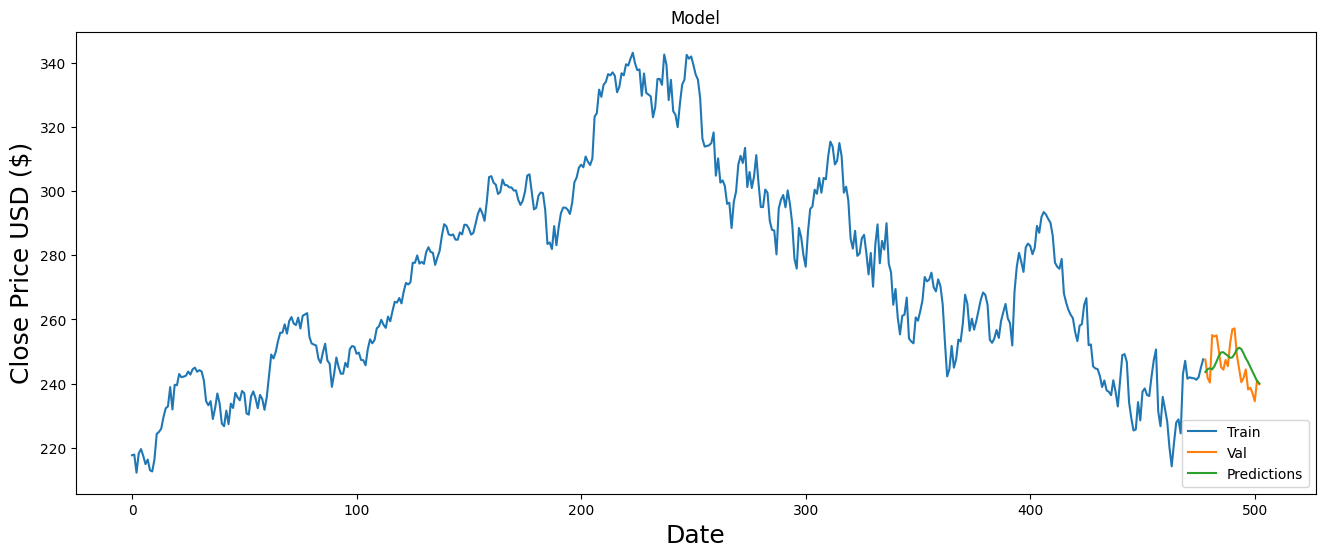

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
df_AAPL2 = df_AAPL.replace(np.nan, 0)

datetimes = pd.to_datetime(df_AAPL2['Date'])

df_AAPL2['day'] = datetimes.dt.day
df_AAPL2['month'] = datetimes.dt.month
df_AAPL2['year'] = datetimes.dt.year


df_AAPL2.head()

,Date,Close,Volume,Returns,day,month,year
0,2021-01-04,129.410004,143301900,0.000000,4,1,2021
1,2021-01-05,131.009995,97664900,1.599991,5,1,2021
2,2021-01-06,126.599998,155088000,-4.409997,6,1,2021
3,2021-01-07,130.919998,109578200,4.320000,7,1,2021
4,2021-01-08,132.050003,105158200,1.130005,8,1,2021


In [ ]:
# Create a new dataframe with only the 'Close column 
# data = df_MSFT2.filter(['Returns'])
data = df_AAPL2.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
acc =1.96 * rmse
print(acc)

[array([0.19878148, 0.22315301, 0.15597864, 0.22178215, 0.23899472,
       0.19223147, 0.18948977, 0.2213252 , 0.19116533, 0.1642041 ,
       0.17471443, 0.23869001, 0.31241426, 0.34592548, 0.40456968,
       0.40822552, 0.39146991, 0.31576538, 0.23762388, 0.27083015,
       0.2837777 , 0.26778374, 0.32033511, 0.3107387 , 0.31302368,
       0.29931448, 0.28987052, 0.28591022, 0.28956581, 0.25635952,
       0.22056354, 0.20335121, 0.2057882 , 0.1468393 , 0.14470679,
       0.13693828, 0.07052547, 0.07463826, 0.17410512, 0.13343492,
       0.08682403, 0.05742569, 0.07707536, 0.        , 0.07204867,
       0.05514093, 0.08530082, 0.07113478, 0.11622236, 0.14028941,
       0.12795128, 0.06351863, 0.05529318, 0.107083  , 0.09413558,
       0.05681638, 0.06443253, 0.07387659, 0.07661841, 0.05392234])]
[0.08819499663625274]

[array([0.19878148, 0.22315301, 0.15597864, 0.22178215, 0.23899472,
       0.19223147, 0.18948977, 0.2213252 , 0.19116533, 0.1642041 ,
       0.17471443, 0.23869001, 0.31

<ipython-input-39-362d373ec6b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


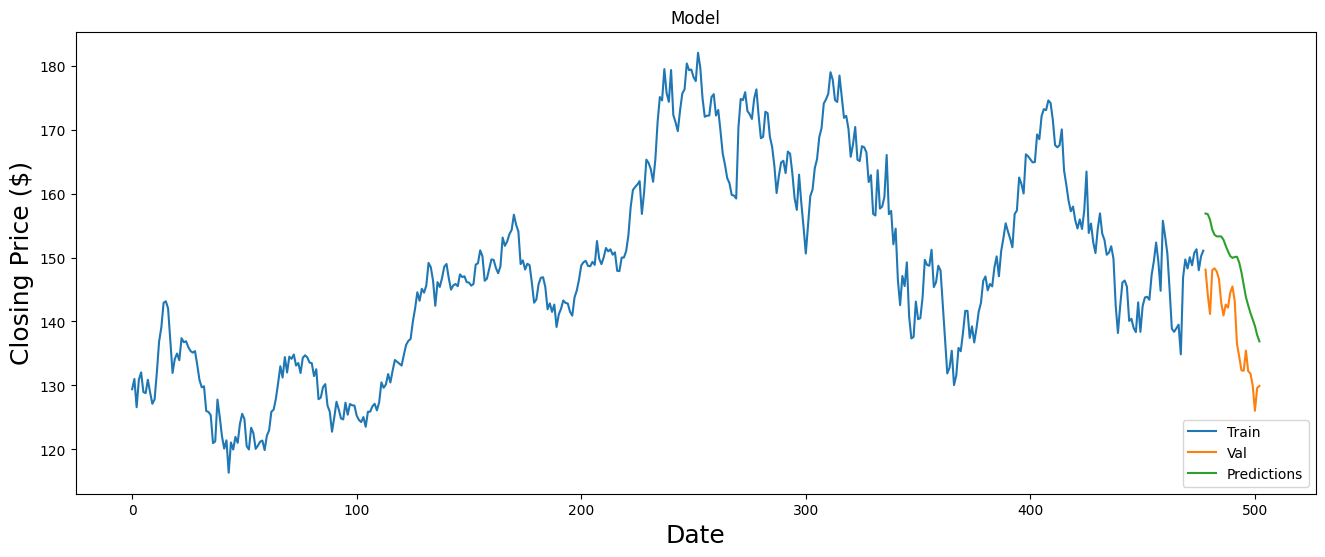

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
df_SMSNG2 = df_SMSNG.replace(np.nan, 0)

datetimes = pd.to_datetime(df_SMSNG2['Date'])

df_SMSNG2['day'] = datetimes.dt.day
df_SMSNG2['month'] = datetimes.dt.month
df_SMSNG2['year'] = datetimes.dt.year


df_SMSNG2.head()

,Date,Close,Volume,day,month,year
0,2021-01-04,83000.0,38655276,4,1,2021
1,2021-01-05,83900.0,35335669,5,1,2021
2,2021-01-06,82200.0,42089013,6,1,2021
3,2021-01-07,82900.0,32644642,7,1,2021
4,2021-01-08,88800.0,59013307,8,1,2021


In [ ]:
# Create a new dataframe with only the 'Close column 
# data = df_MSFT2.filter(['Returns'])
#data = df_AAPL2.filter(['Close'])
data = df_SMSNG2.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
acc =1.96 * rmse
print(acc)

[array([0.79166667, 0.81510417, 0.77083333, 0.7890625 , 0.94270833,
       1.        , 0.98958333, 0.96614583, 0.96614583, 0.921875  ,
       0.84375   , 0.89583333, 0.90104167, 0.92447917, 0.890625  ,
       0.95833333, 0.88802083, 0.859375  , 0.80989583, 0.765625  ,
       0.79166667, 0.828125  , 0.83333333, 0.77864583, 0.8046875 ,
       0.79166667, 0.78385417, 0.75520833, 0.82291667, 0.84114583,
       0.796875  , 0.76822917, 0.78125   , 0.77083333, 0.765625  ,
       0.765625  , 0.8515625 , 0.77864583, 0.80729167, 0.81770833,
       0.77604167, 0.76822917, 0.765625  , 0.75      , 0.73697917,
       0.765625  , 0.78645833, 0.76041667, 0.78645833, 0.7734375 ,
       0.7890625 , 0.76302083, 0.765625  , 0.76041667, 0.73958333,
       0.74479167, 0.75260417, 0.75520833, 0.77083333, 0.75      ])]
[0.7890625000000002]

[array([0.79166667, 0.81510417, 0.77083333, 0.7890625 , 0.94270833,
       1.        , 0.98958333, 0.96614583, 0.96614583, 0.921875  ,
       0.84375   , 0.89583333, 0.901

<ipython-input-8-362d373ec6b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


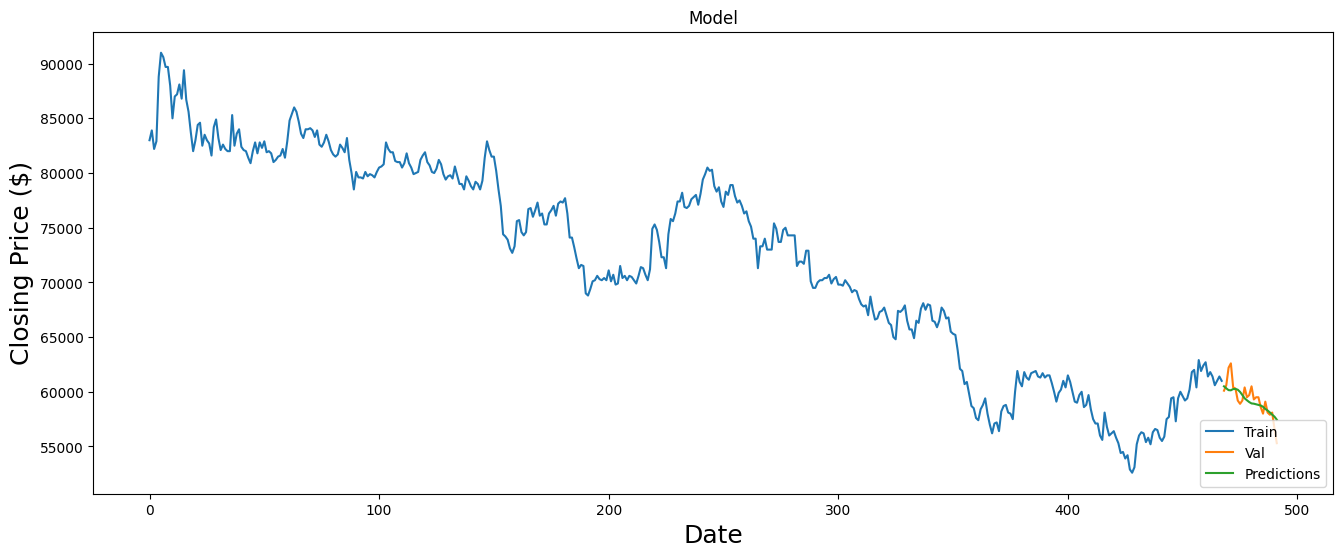

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
df_All.head()

,Date,Close_SMSNG,Volume_SMSNG,Returns_SMSNG,Close_AAPL,Volume_AAPL,Returns_AAPL,Close_MSFT,Volume_MSFT,Returns_MSFT
0,2021-01-04,83000.0,38655276,900.0,217.690002,37130100.0,0.209992,129.410004,143301900.0,1.599991
1,2021-01-05,83900.0,35335669,900.0,217.899994,23823000.0,0.209992,131.009995,97664900.0,1.599991
2,2021-01-06,82200.0,42089013,-1700.0,212.250000,35930700.0,-5.649994,126.599998,155088000.0,-4.409997
3,2021-01-07,82900.0,32644642,700.0,218.289993,27694500.0,6.039993,130.919998,109578200.0,4.320000
4,2021-01-08,88800.0,59013307,5900.0,219.619995,22956200.0,1.330002,132.050003,105158200.0,1.130005


In [ ]:
ds = df_All.drop(['Date'], axis = 1)

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = ds
values = dataset.values
print(values)

[[ 8.30000000e+04  3.86552760e+07  9.00000000e+02 ...  1.29410004e+02
   1.43301900e+08  1.59999100e+00]
 [ 8.39000000e+04  3.53356690e+07  9.00000000e+02 ...  1.31009995e+02
   9.76649000e+07  1.59999100e+00]
 [ 8.22000000e+04  4.20890130e+07 -1.70000000e+03 ...  1.26599998e+02
   1.55088000e+08 -4.40999700e+00]
 ...
 [ 5.81000000e+04  1.06670270e+07  2.00000000e+02 ...  1.30029999e+02
   6.90078000e+07 -1.83000200e+00]
 [ 5.66000000e+04  1.46654100e+07 -1.50000000e+03 ...  1.26040001e+02
   8.54384000e+07 -3.98999800e+00]
 [ 5.53000000e+04  1.12959350e+07 -1.30000000e+03 ...  1.29610001e+02
   7.57037000e+07  3.57000000e+00]]


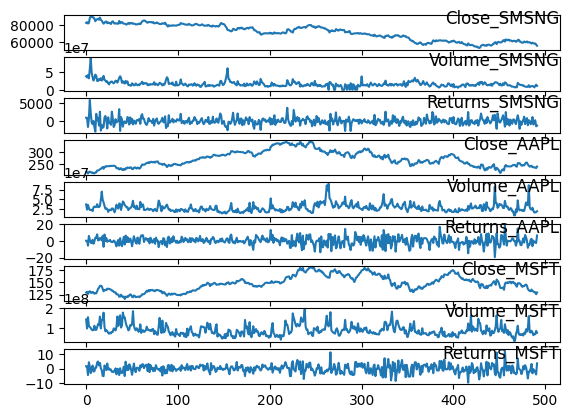

In [ ]:
# specify columns to plot
groups = [0, 1, 2, 3,4, 5, 6, 7, 8]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()


In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
     cols.append(df.shift(i))
     names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
     cols.append(df.shift(-i))
     if i == 0:
         names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
     else:
         names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
     agg = concat(cols, axis=1)
     agg.columns = names
 # drop rows with NaN values
     if dropnan:
         agg.dropna(inplace=True)
     return agg

In [ ]:

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,15,16,17]], axis=1, inplace=True)
reframed.head(5)

reframed.shape

(491, 10)

In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = 400 
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(400, 1, 9) (400,) (91, 1, 9) (91,)


Epoch 1/50
6/6 - 3s - loss: 0.5131 - val_loss: 0.4551 - 3s/epoch - 437ms/step
Epoch 2/50
6/6 - 0s - loss: 0.4456 - val_loss: 0.3994 - 57ms/epoch - 10ms/step
Epoch 3/50
6/6 - 0s - loss: 0.3770 - val_loss: 0.3421 - 75ms/epoch - 13ms/step
Epoch 4/50
6/6 - 0s - loss: 0.3080 - val_loss: 0.2831 - 82ms/epoch - 14ms/step
Epoch 5/50
6/6 - 0s - loss: 0.2395 - val_loss: 0.2237 - 69ms/epoch - 11ms/step
Epoch 6/50
6/6 - 0s - loss: 0.1773 - val_loss: 0.1739 - 169ms/epoch - 28ms/step
Epoch 7/50
6/6 - 0s - loss: 0.1320 - val_loss: 0.1403 - 70ms/epoch - 12ms/step
Epoch 8/50
6/6 - 0s - loss: 0.1147 - val_loss: 0.1261 - 68ms/epoch - 11ms/step
Epoch 9/50
6/6 - 0s - loss: 0.1169 - val_loss: 0.1249 - 64ms/epoch - 11ms/step
Epoch 10/50
6/6 - 0s - loss: 0.1177 - val_loss: 0.1249 - 54ms/epoch - 9ms/step
Epoch 11/50
6/6 - 0s - loss: 0.1136 - val_loss: 0.1275 - 54ms/epoch - 9ms/step
Epoch 12/50
6/6 - 0s - loss: 0.1101 - val_loss: 0.1317 - 76ms/epoch - 13ms/step
Epoch 13/50
6/6 - 0s - loss: 0.1096 - val_loss: 0.1

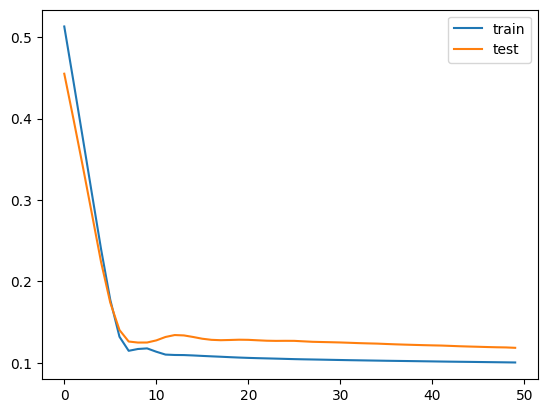

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

3/3 [==============================] - 0s 3ms/step
Test RMSE: 6293.843


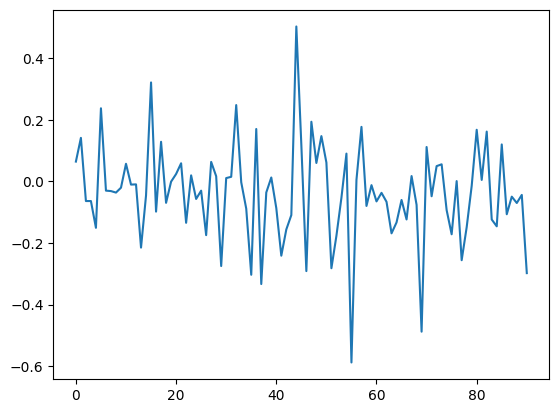

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(yhat-test_y)
pyplot.show()

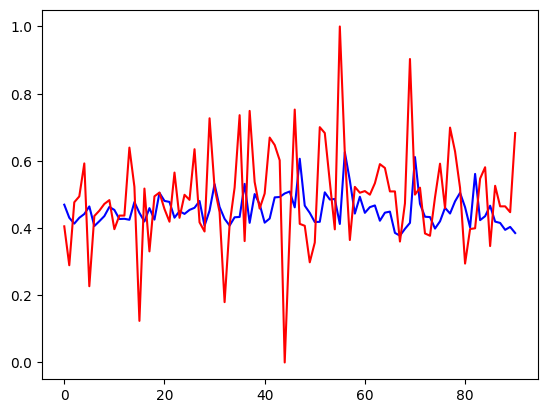

In [ ]:
pyplot.plot(yhat, color = 'b')
pyplot.plot(test_y, color = 'red')
pyplot.show()